<a href="https://colab.research.google.com/github/zhulkhoirr/Steam-Recommendation-System/blob/main/SteamRecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistem Rekomendasi Game Pada Platform Steam

## Download Dataset Dari Kaggle

In [ ]:
from google.colab import files
files.upload()

In [1]:
!pip install -q kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d fronkongames/steam-games-dataset/

Dataset URL: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset/versions/
License(s): MIT
 95% 200M/211M [00:01<00:00, 128MB/s]
100% 211M/211M [00:02<00:00, 96.6MB/s]


In [5]:
!unzip -q steam-games-dataset.zip

## Memahami Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
users_df = pd.read_csv('users.csv')

users_df.sample(5)

,UserID,AppID,Playtime,Rating,IsRecommended
89,7378197320625675,359550,185.0,5,1
610,1323526202167619,273110,58.0,5,1
685,4767028721037826,2835570,6.0,4,1
336,7843003222872772,238960,1.0,4,1
38,5367,632360,10.0,4,1


In [27]:
column_names = [
    "AppID", "Name", "Release date", "Estimated owners", "Peak CCU",
    "Required age", "Price", "Discount", "DLC count", "About the game",
    "Supported languages", "Full audio languages", "Reviews", "Header image",
    "Website", "Support url", "Support email", "Windows", "Mac", "Linux",
    "Metacritic score", "Metacritic url", "User score", "Positive",
    "Negative", "Score rank", "Achievements", "Recommendations", "Notes",
    "Average playtime forever", "Average playtime two weeks",
    "Median playtime forever", "Median playtime two weeks", "Developers",
    "Publishers", "Categories", "Genres", "Tags", "Screenshots", "Movies"
]

games_df = pd.read_csv('games.csv', names=column_names, header=0, index_col=False)


# selected_columns = [
#     "AppID", "Name", "Price", "Publishers", "Developers", "Categories", "Genres", "Tags", "Recommendations"
# ]

# games_df = games_df[selected_columns]

games_df.sample(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
89253,2890100,I brought the noble girl home,"Mar 28, 2024",0 - 0,0,0,1.59,0,0,"The future war broke out, and many noble girls...",...,0,0,0,7miao game,7miao game,"Single-player,Steam Achievements,Family Sharing","Action,Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2410,603320,Age of Defense,"May 27, 2019",50000 - 100000,2,0,9.99,0,0,Ancient world is really dangerous. You must pr...,...,0,15,0,Battlecruiser Games,Battlecruiser Games,Single-player,"Indie,Strategy,Early Access","Indie,Tower Defense,Strategy,Early Access,RTS",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
37230,679160,CollabHub,"Jan 27, 2021",0 - 20000,0,0,11.99,0,0,CollabHub is your ideal creative workspace whe...,...,0,0,0,CollabHub,CollabHub,NaN,"Design & Illustration,Utilities","Utilities,Design & Illustration,VR",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
25277,1131690,Xentripetal Force,"Sep 20, 2019",0 - 20000,0,0,0.99,0,0,Xentripetal Force is an action game that let's...,...,0,0,0,Aq,Aq,"Single-player,Multi-player,PvP,Shared/Split Sc...","Action,Indie","Action,Indie,4 Player Local,Local Multiplayer",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
67071,2089080,Loot Box Waifus,"Dec 5, 2022",0 - 20000,3,0,0.89,0,0,Do you like opening chests? Do you like gainin...,...,0,0,0,waifuDD,waifuDD,"Single-player,Steam Achievements,Stats","Simulation,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [40]:
updated_name = 'Counter-Strike 2'
updated_dev = 'Valve'
updated_tags = ('FPS, Shooter, Multiplayer, Competitive, Action, Team-Based, eSports, Tactical, '
                'First-Person, PvP, Online Co-Op, Co-op, Strategy, Military, War, Difficult, '
                'Trading, Realistic, Fast-Paced, Moddable')
updated_categories = ('Cross-Platform Multiplayer, Steam Trading Cards, Steam Workshop, '
                      'In-App Purchases, Stats, Remote Play on Phone, Remote Play on Tablet, '
                      'Remote Play on TV, Steam Timeline, Multi-player, Valve Anti-Cheat, '
                      'Native Steam Controller, Cloud Gaming, Cloud Gaming (NVIDIA)')

games_df.loc[games_df['AppID'] == 730, 'Name'] = updated_name
games_df.loc[games_df['AppID'] == 730, 'Developers'] = updated_dev
games_df.loc[games_df['AppID'] == 730, 'Tags'] = updated_tags
games_df.loc[games_df['AppID'] == 730, 'Categories'] = updated_categories

In [41]:
check = games_df[games_df['AppID'] == 730]
check

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
46158,730,Counter-Strike 2,"Aug 21, 2012",50000000 - 100000000,825215,0,0.0,0,1,Counter-Strike: Global Offensive (CS: GO) expa...,...,777,6357,253,Valve,Valve,"Cross-Platform Multiplayer, Steam Trading Card...","Action,Free to Play","FPS, Shooter, Multiplayer, Competitive, Action...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/8...


In [42]:
filter_average_playtime = games_df['Average playtime two weeks'] > 0
average_check = games_df[filter_average_playtime]
average_check

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
47,552520,Far Cry® 5,"Mar 26, 2018",2000000 - 5000000,2164,17,59.99,0,5,Far Cry comes to America in the latest install...,...,223,1258,311,"Ubisoft Montreal,Red Storm,Ubisoft Shanghai,Ub...",Ubisoft,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure","Open World,Co-op,Action,Multiplayer,FPS,Shoote...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
57,1293830,Forza Horizon 4,"Mar 9, 2021",2000000 - 5000000,7571,0,59.99,0,15,Dynamic seasons change everything at the world...,...,230,1021,130,Playground Games,Xbox Game Studios,"Single-player,Multi-player,PvP,Online PvP,Co-o...",Racing,"Racing,Open World,Driving,Multiplayer,Online C...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
66,12140,Max Payne,"Jan 6, 2011",500000 - 1000000,49,17,3.49,0,0,Max Payne is a man with nothing to lose in the...,...,79,80,79,Remedy Entertainment,Rockstar Games,Single-player,Action,"Action,Noir,Classic,Third-Person Shooter,Bulle...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
71,541570,Sally Face - Episode One,"Dec 14, 2016",500000 - 1000000,133,0,2.99,0,1,A DARK MYSTERY IS UNFOLDING... Delve into an u...,...,20,295,20,Portable Moose,Portable Moose,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Story Rich,Psychological Horror,Dark,Horror,In...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
93,1066890,Automobilista 2,"Jun 30, 2020",200000 - 500000,358,0,23.99,0,11,Automobilista 2 is the culmination of a projec...,...,24,2606,24,Reiza Studios,Reiza Studios,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Racing,Simulation,Sports","Racing,Simulation,Sports,VR,Automobile Sim,Dri...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97000,1672500,GUNDAM BREAKER 4,"Aug 28, 2024",100000 - 200000,21237,0,59.99,0,4,Create your own ultimate Gundam in the newest ...,...,409,673,673,"CRAFTS ＆ MEISTER Co., Ltd",Bandai Namco Entertainment Inc.,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,RPG","Action,Hack and Slash,Robots,RPG,Action RPG,Me...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
97023,1040200,Crime Scene Cleaner,"Aug 14, 2024",200000 - 500000,3951,0,19.99,0,1,When insurance companies dodge the responsibil...,...,196,256,256,President Studio,"President Studio,PlayWay S.A.","Single-player,Steam Achievements,Full controll...","Action,Simulation","Crime,Simulation,Gore,Singleplayer,First-Perso...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
97161,1575940,Sins of a Solar Empire II,"Aug 15, 2024",100000 - 200000,5654,0,49.99,0,0,Sins of a Solar Empire II is the sequel to the...,...,126,151,151,"Ironclad Games Corporation,Stardock Entertainment",Stardock Entertainment,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Simulation,Strategy","Strategy,Space,4X,RTS,Sci-fi,Multiplayer,Singl...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
97235,2366980,Thank Goodness You're Here!,"Aug 1, 2024",50000 - 100000,216,0,19.99,0,0,NaN,...,265,265,265,Coal Supper,Panic,"Single-player,Steam Achievements,Full controll...","Adventure,Casual,Indie","Adventure,Comedy,Hand-drawn,Funny,Exploration,...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...


In [43]:
selected_columns = [
    "AppID", "Name", "Price", "Publishers", "Developers", "Categories", "Genres", "Tags", "Average playtime two weeks"
]
req_check = average_check[selected_columns]

req_check.sample(5)

,AppID,Name,Price,Publishers,Developers,Categories,Genres,Tags,Average playtime two weeks
78489,1988550,To The Core,7.99,SomethingExtra,SomethingExtra,Single-player,"Adventure,Casual,Indie","Casual,Clicker,Adventure,Arcade,2D,Procedural ...",585
20925,1349230,5D Chess With Multiverse Time Travel,11.99,"Conor Petersen,Thunkspace, LLC","Conor Petersen,Thunkspace, LLC","Single-player,Multi-player,PvP,Online PvP,Shar...",Indie,"Chess,Time Travel,Time Manipulation,Board Game...",30
41149,493340,Planet Coaster,11.24,"Frontier Developments,Aspyr (Mac)","Frontier Developments,Aspyr (Mac)","Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Casual,Simulation,Strategy","Simulation,Building,Management,Family Friendly...",4940
5912,633230,NARUTO TO BORUTO: SHINOBI STRIKER,49.99,BANDAI NAMCO Entertainment,Soleil Ltd.,"Single-player,Multi-player,PvP,Online PvP,Co-o...",Action,"Anime,Action,Character Customization,Multiplay...",26
15118,311210,Call of Duty®: Black Ops III,59.99,"Activision,Aspyr (Mac)","Treyarch,Aspyr (Mac)","Single-player,Multi-player,Co-op,Shared/Split ...","Action,Adventure","Multiplayer,FPS,Zombies,Shooter,Action,First-P...",442


In [44]:
req_check.to_csv('steam.csv', index=False)

In [45]:
# Cek kolom di users_df
print("Kolom di users_df:", users_df.columns)

# Cek kolom di games_df
print("Kolom di games_df:", games_df.columns)

Kolom di users_df: Index(['UserID', 'AppID', 'Playtime', 'Rating', 'IsRecommended'], dtype='object')
Kolom di games_df: Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'Discount', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')


In [46]:
selected_columns_for_merge = ['AppID', 'Name', 'Release date', 'Price', 'About the game', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags']
short_games_df = games_df[selected_columns_for_merge]

user_with_games_df = pd.merge(users_df, short_games_df, on='AppID', how='inner')

user_with_games_df

,UserID,AppID,Playtime,Rating,IsRecommended,Name,Release date,Price,About the game,Developers,Publishers,Categories,Genres,Tags
0,2261676974623107,1238810,2.0,4,1,Battlefield V,"Oct 22, 2020",14.99,This is the ultimate Battlefield V experience....,DICE,Electronic Arts,"Single-player,Multi-player,PvP,Online PvP,Stea...",Action,"FPS,World War II,Shooter,Multiplayer,Singlepla..."
1,2261676974623107,444200,2.0,4,1,World of Tanks Blitz,"Nov 9, 2016",0.00,Jump into a free-to-play MMO action shooter fe...,Wargaming Group Limited,Wargaming Group Limited,"Multi-player,MMO,PvP,Online PvP,Co-op,Online C...","Action,Free to Play,Massively Multiplayer","Tanks,Free to Play,Action,Multiplayer,World Wa..."
2,2261676974623107,242760,2.0,3,1,The Forest,"Apr 30, 2018",19.99,"As the lone survivor of a passenger jet crash,...",Endnight Games Ltd,Endnight Games Ltd,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure,Indie,Simulation","Open World Survival Craft,Survival,Open World,..."
3,2261676974623107,2668080,3.0,4,1,Snowbreak: Containment Zone,"Dec 24, 2023",0.00,Snowbreak: Containment Zone is a 3D sci-fi RPG...,Amazing Seasun Games,Amazing Seasun Games,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure,RPG",NaN
4,2261676974623107,1222680,1.0,3,1,Need for Speed™ Heat,"Jun 4, 2020",69.99,A thrilling race experience pits you against a...,Ghost Games,Electronic Arts,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,Adventure,Racing,Sports","Racing,Open World,Driving,Multiplayer,Action,A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,2443289361417818,648800,60.0,4,0,Raft,"Jun 20, 2022",19.99,"By yourself or with friends, your mission is t...",Redbeet Interactive,Axolot Games,"Single-player,Multi-player,Co-op,Online Co-op,...","Adventure,Indie,Simulation","Survival,Open World Survival Craft,Multiplayer..."
765,4746043026050732,1259970,1.0,4,1,eFootball PES 2021 SEASON UPDATE,"Sep 15, 2020",0.00,'Please note that the latest data for certain ...,Konami Digital Entertainment,Konami Digital Entertainment,"Single-player,Multi-player,PvP,Online PvP,Shar...",Sports,"Sports,Football (Soccer),Multiplayer,e-sports,..."
766,4746043026050732,945360,1.0,3,1,Among Us,"Nov 16, 2018",3.99,Play with 4-15 player online or via local WiFi...,Innersloth,Innersloth,"Multi-player,PvP,Online PvP,LAN PvP,Co-op,Onli...",Casual,"Multiplayer,Online Co-Op,Social Deduction,Spac..."
767,4746043026050732,1811260,1.0,3,1,EA SPORTS™ FIFA 23,"Sep 29, 2022",69.99,The World’s Game EA SPORTS™ FIFA 23 brings The...,EA Canada & EA Romania,Electronic Arts,"Single-player,Multi-player,PvP,Online PvP,Shar...","Simulation,Sports","Immersive Sim,Sports,Soccer,Football,Managemen..."


In [47]:
user_with_games_df.to_csv('user_with_games.csv', index=False)

## Neural Collaborative Filtering

### 1. Cleaning Data

In [45]:
users_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi:",  users_df.duplicated().sum())

Jumlah duplikasi: 0


In [46]:
users_df = users_df.fillna(0.1)

In [47]:
users_df.isnull().sum()

,0
UserID,0
AppID,0
Playtime,0
Rating,0
IsRecommended,0
user,0
app,0


### 2. Pre-processing

In [48]:
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
users_df['user'] = user_encoder.fit_transform(users_df['UserID'])
user_ids = user_encoder.classes_
n_users = len(user_ids)

app_encoder = LabelEncoder()
users_df['app'] = app_encoder.fit_transform(users_df['AppID'])
app_ids = app_encoder.classes_
n_app = len(app_ids)

user_encoded = dict(zip(user_encoder.classes_, user_encoder.transform(user_encoder.classes_)))
back_user_encoded = dict(zip(user_encoder.transform(user_encoder.classes_), user_encoder.classes_))

app_encoded = dict(zip(app_encoder.classes_, app_encoder.transform(app_encoder.classes_)))
back_app_encoded = dict(zip(app_encoder.transform(app_encoder.classes_), app_encoder.classes_))

print(f"Jumlah user: {n_users}, Jumlah game: {n_app}")

Jumlah user: 165, Jumlah game: 345


In [49]:
print("User ID range:", users_df['user'].min(), "to", users_df['user'].max())
print("App ID range:", users_df['app'].min(), "to", users_df['app'].max())

users_df['user'] = users_df['user'].astype('int32')
users_df['app'] = users_df['app'].astype('int32')

User ID range: 0 to 164
App ID range: 0 to 344


In [50]:
users_df = users_df.sample(frac=1, random_state=46)

X = users_df[['user', 'app']].values
y = users_df['IsRecommended']

X.shape, y.shape

((805, 2), (805,))

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print("Train set: {}".format(len(y_train)))
print("Test set: {}".format(len(y_test)))

Train set: 644
Test set: 161


In [59]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train[:, 0] = scaler.fit_transform(X_train[:, 0].reshape(-1, 1)).flatten()
# X_train[:, 1] = scaler.fit_transform(X_train[:, 1].reshape(-1, 1)).flatten()
# X_test[:, 0] = scaler.transform(X_test[:, 0].reshape(-1, 1)).flatten()
# X_test[:, 1] = scaler.transform(X_test[:, 1].reshape(-1, 1)).flatten()

In [61]:
X_train[:, 0]

array([116, 148,  46, 148,  85,  88,  73,  88,  54,  20,  38, 130, 128,
         6,  35,  21,  91,  80, 156, 162,  31, 164,  34,   5,  87, 152,
         3,  38, 128,  59,  48, 134,  62,   7,  54, 132, 134,  14,  32,
       119, 122, 114,  65, 106,  41, 129,   2,  16,  45,  41,  30,  96,
       135,  33,  49,  85,  15, 122, 146,  35,  30, 132, 151,  66,  82,
       108, 135, 134,  78,  47, 156,  98,  79, 146,  94,  61, 101,  18,
        67,  82,  99, 133, 118, 107,  99,  78, 150,  14,  53, 115, 119,
       163, 124, 138, 115, 100,  55, 102, 111,  45,  30,  75, 103, 112,
        74,  31,  84,  79,  76, 127, 112,  70,  79,  93,  69, 108, 158,
        51, 108, 146,  59, 128,  57, 150, 100, 106,   0,  24, 155, 157,
        64, 160, 106, 141,  28,  71, 134, 161, 109,  98,  83,  72,  28,
         8, 105, 104,  16,  42,  66,  41, 138,  70, 104, 159, 121,  26,
        55, 160, 114,  65, 152,  46,  81, 100, 162,  67, 127,  64,  72,
        43, 121, 118,  43,  89, 122, 140,   6, 153,  25, 119,  9

### 3. Membuat Model

In [105]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def mse(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  # Hitung selisih
  error = y_true - y_pred
  # Kuadratkan selisih
  squared_error = tf.square(error)
  # Jumlahkan semua elemen
  sum_squared_error = tf.reduce_sum(squared_error)
  # Hitung jumlah elemen (n)
  n = tf.cast(tf.size(y_true), tf.float32)  # Pastikan dalam bentuk float
  # Bagikan jumlah kuadrat dengan n
  mse = sum_squared_error / n
  return mse

def rmse(y_true, y_pred):
  mse_value = mse(y_true, y_pred)
  # Hitung akar mse
  rmse = tf.sqrt(mse_value)
  return rmse

def RecommenderNet(n_users, n_app, embedding_size=32):
  user_input = Input(shape=(1,), name='user')
  user_embedding = Embedding(n_users + 1, embedding_size, name='user_embedding')(user_input)
  app_input = Input(shape=(1,), name='app')
  app_embedding = Embedding(n_app + 1, embedding_size, name='app_embedding')(app_input)

  concatenate = Concatenate(name='concatenate')([user_embedding, app_embedding])
  flatten = Flatten(name='flatten')(concatenate)

  dense = Dense(128, activation='relu', kernel_regularizer=l2(0.001), name='dense')(flatten)
  batch_norm = BatchNormalization(name='batch_norm')(dense)
  dropout = Dropout(0.3, name='dropout')(batch_norm)

  dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(0.001), name='dense_2')(dropout)
  batch_norm_2 = BatchNormalization(name='batch_norm_2')(dense_2)
  dropout_2 = Dropout(0.3, name='dropout_2')(batch_norm_2)
  output = Dense(1, activation='sigmoid', name='output')(dropout_2)

  model = Model([user_input, app_input], output)

  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[mse, rmse])

  return model

model = RecommenderNet(n_users, n_app)

model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)         │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ app (InputLayer)          │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 32)          │          5,312 │ user[0][0]             │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ app_embedding (Embedding) │ (None, 1, 32)          │         11,072 │ app[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 1, 64)          │              0 │ user_embedding[0][0],  │
│                           │                        │                │ app_embedding[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 64)             │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │          8,320 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_norm                │ (None, 128)            │            512 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ batch_norm[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │          8,256 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_norm_2              │ (None, 64)             │            256 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64)             │              0 │ batch_norm_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │             65 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 33,793 (132.00 KB)

 Trainable params: 33,409 (130.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [111]:
history = model.fit(
    x=[X_train[:, 0], X_train[:, 1]],
    y=y_train,
    epochs=25,
    batch_size=8,
    validation_data=([X_test[:, 0], X_test[:, 1]], y_test),
    callbacks=[early_stopping],
    shuffle=True
)

Epoch 1/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3156 - mse: 0.0457 - rmse: 0.1806 - val_loss: 0.6221 - val_mse: 0.1062 - val_rmse: 0.2808
Epoch 2/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2873 - mse: 0.0367 - rmse: 0.1616 - val_loss: 0.6411 - val_mse: 0.1119 - val_rmse: 0.2878
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2780 - mse: 0.0366 - rmse: 0.1563 - val_loss: 0.7228 - val_mse: 0.1252 - val_rmse: 0.3082
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2799 - mse: 0.0356 - rmse: 0.1394 - val_loss: 0.7012 - val_mse: 0.1113 - val_rmse: 0.2920
Epoch 5/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2554 - mse: 0.0290 - rmse: 0.1189 - val_loss: 0.7615 - val_mse: 0.1220 - val_rmse: 0.2953
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


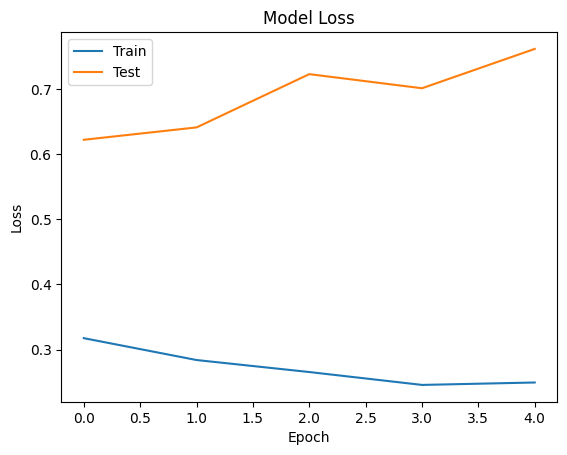

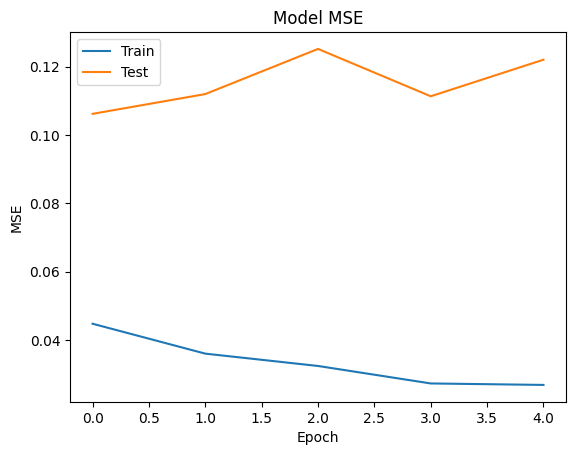

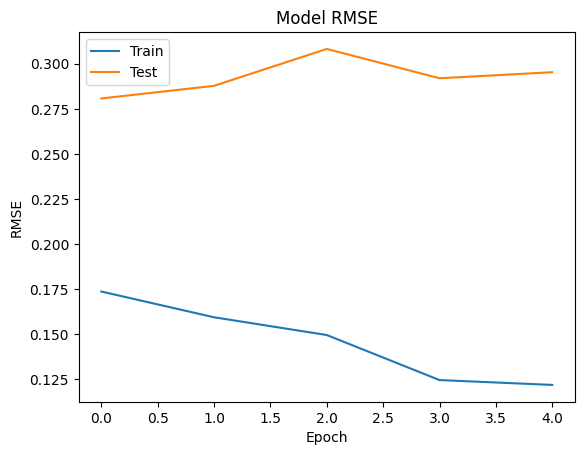

In [112]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot MSE
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot RMSE
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [92]:
model.save('model/model.h5')

### 4. Prediksi Model

In [101]:
user_counts = users_df['UserID'].value_counts()

good_user = user_counts[user_counts > 1].index

random_user = np.random.choice(good_user)
print(f'Selected user_id: {random_user}')

Selected user_id: 2155469645786423


In [102]:
from tensorflow.keras.models import load_model

model = load_model('model/model.h5')

# random_user = 67

user_with_games_df = pd.read_csv('user_with_games.csv')

user_games = users_df[users_df.UserID == random_user]['AppID'].values

all_games = set(user_with_games_df['AppID'])
unplayed_games = all_games - set(user_games)

user_encoder = user_encoded.get(random_user)
unplayed_game_encoders = [[app_encoded.get(x)] for x in unplayed_games if x in app_encoded]

user_game_array = np.hstack(([[user_encoder]] * len(unplayed_game_encoders), unplayed_game_encoders))
user_game_array = [user_game_array[:, 0], user_game_array[:, 1]]

recommendations = model.predict(user_game_array).flatten()

top_recommendations = (-recommendations).argsort()[:10]


recommended_games_ids = [back_app_encoded.get(unplayed_game_encoders[top_recommendations[x]][0]) for x in range(len(top_recommendations)) if unplayed_game_encoders[top_recommendations[x]][0] in back_app_encoded]

results = []
top_recommendations_ids = []
for index, game_encoder in enumerate(unplayed_game_encoders):
    game_id = back_app_encoded.get(game_encoder[0])
    if game_id in recommended_games_ids:
        top_recommendations_ids.append(game_id)
        try:
            game_info = user_with_games_df[user_with_games_df.AppID == game_id].iloc[0]
            results.append({
                'Name': game_info['Name'],
                'Price': game_info['Price'],
                'Publisher': game_info['Publishers'],
                'Developer': game_info['Developers'],
                'Categories': game_info['Categories'],
                'Genres': game_info['Genres'],
                'Tags': game_info['Tags'],
                'Score': recommendations[index]
            })
        except Exception as e:
            print(f"Error processing game {game_id}: {e}")
            continue

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Score', ascending=False)
results_df

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,Name,Price,Publisher,Developer,Categories,Genres,Tags,Score
9,Yakuza 0,19.99,SEGA,SEGA,"Single-player,Multi-player,Steam Achievements,...","Action,Adventure,RPG","Story Rich,Action,Beat 'em up,Great Soundtrack...",0.975036
6,Max Payne 2: The Fall of Max Payne,4.49,Rockstar Games,Remedy Entertainment,Single-player,Action,"Action,Noir,Third-Person Shooter,Classic,Bulle...",0.974715
2,Total War: SHOGUN 2,29.99,"SEGA,Feral Interactive (Mac),Feral Interactive...","CREATIVE ASSEMBLY,Feral Interactive (Mac),Fera...","Single-player,Multi-player,PvP,Online PvP,LAN ...",Strategy,"Strategy,Historical,Turn-Based Strategy,RTS,Gr...",0.970990
5,NARUTO SHIPPUDEN: Ultimate Ninja STORM 4,29.99,BANDAI NAMCO Entertainment,CyberConnect2 Co. Ltd.,"Single-player,Multi-player,PvP,Shared/Split Sc...","Action,Adventure","Anime,Fighting,Action,Ninja,Multiplayer,Advent...",0.970239
0,Borderlands 2,19.99,"2K,Aspyr (Mac),Aspyr (Linux)","Gearbox Software,Aspyr (Mac),Aspyr (Linux)","Single-player,Multi-player,Co-op,Steam Achieve...","Action,RPG","Loot,Shooter,Action,Multiplayer,Co-op,Looter S...",0.969842
3,Dinkum,19.99,James Bendon,James Bendon,"Single-player,Multi-player,Co-op,Online Co-op,...","Indie,RPG,Simulation,Early Access","Early Access,Adventure,Online Co-Op,Co-op,Life...",0.969487
1,You Have 10 Seconds (2023),0.00,"xJackFox, TamationGames",xJackFox,"Single-player,Steam Achievements,Full controll...","Casual,Free to Play,Strategy",NaN,0.967106
8,Total War™: ROME II - Emperor Edition,59.99,SEGA,CREATIVE ASSEMBLY,"Single-player,Multi-player,PvP,Online PvP,LAN ...",Strategy,"Strategy,Turn-Based Strategy,Historical,Grand ...",0.967069
4,Call of Duty®: Warzone™ 2.0,0.00,Activision,"Infinity Ward,Raven Software,Beenox,Treyarch,H...","Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,Free to Play",NaN,0.966732
7,STAR WARS Jedi: Fallen Order™,14.99,Electronic Arts,Respawn Entertainment,"Single-player,Steam Achievements,Full controll...","Action,Adventure","Action-Adventure,Souls-like,Third Person,Sword...",0.965996
